<a href="https://colab.research.google.com/github/SiddharthGoel/MushroomBinaryClassification/blob/master/ModelAnalysisAndProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.stats import norm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import cross_val_score

data = pd.read_csv("https://raw.githubusercontent.com/SiddharthGoel/MushroomClassification/main/mushroom_cleaned.csv")
df = pd.DataFrame(data)
df.head(10)

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1
5,1337,6,2,10,3.775635,1520,11,0.943195,1
6,1300,2,2,10,3.835320,1563,11,1.804273,1
7,1354,6,2,10,3.676160,1532,11,0.888450,1
8,1222,6,2,10,3.771656,1476,11,0.943195,1
9,1085,6,2,10,3.775635,1581,11,0.888450,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


In [3]:
df.isnull().sum()

cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
class              0
dtype: int64

<Axes: xlabel='class', ylabel='count'>

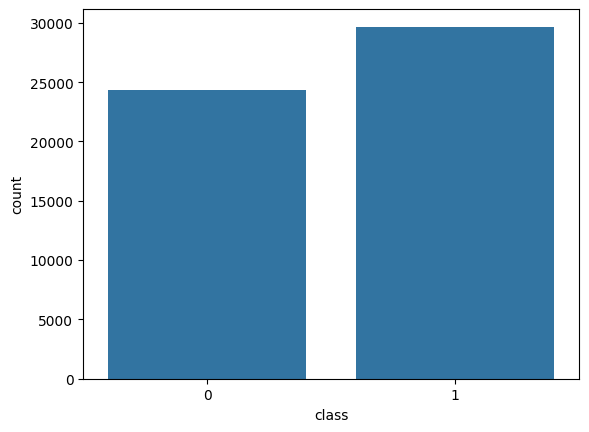

In [4]:
sns.countplot(data=df, x='class')

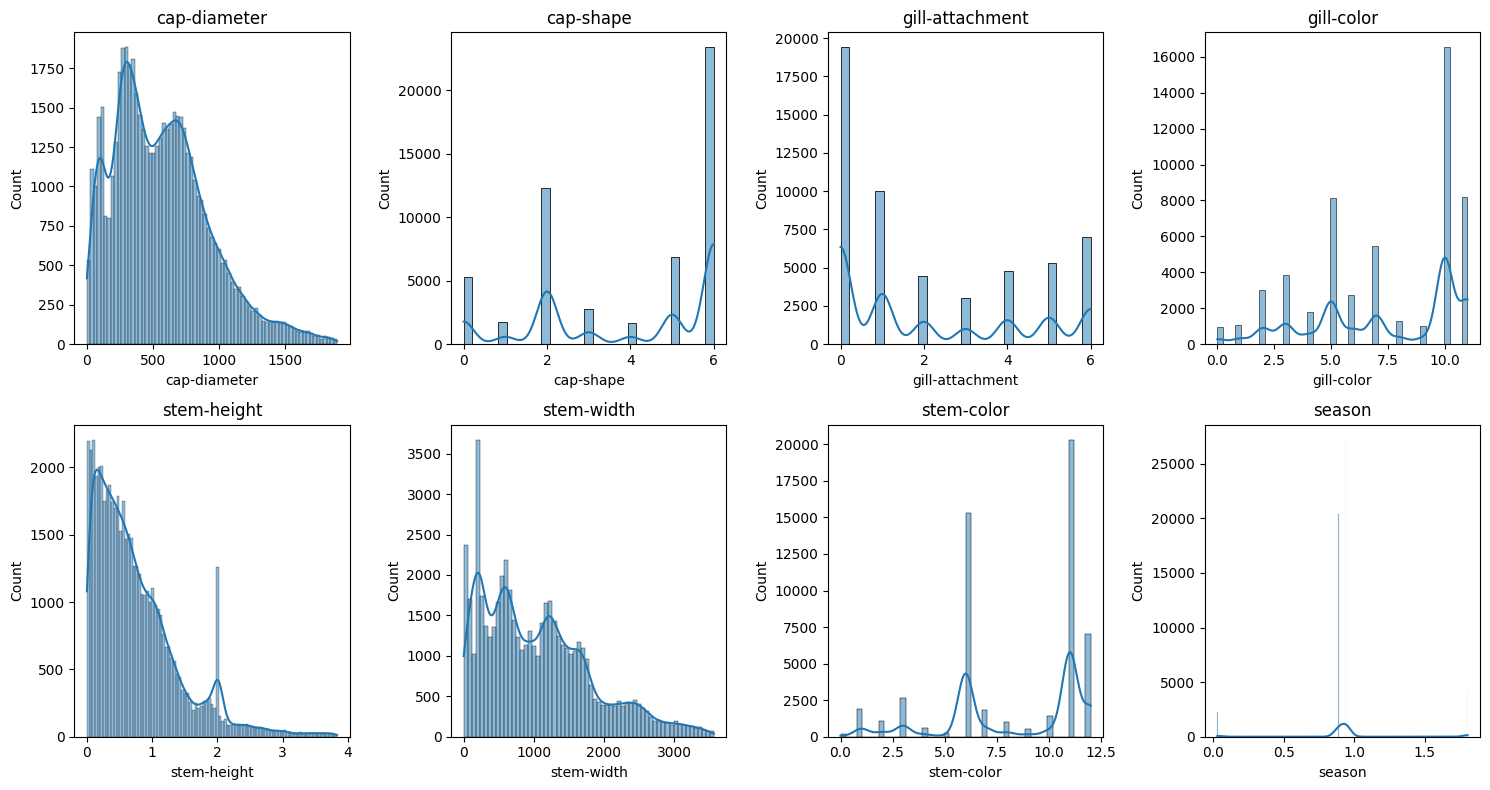

In [5]:
columns = ['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color', 'stem-height', 'stem-width', 'stem-color', 'season']

fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))
axs = axs.flatten()
for i, column in enumerate(columns):
    sns.histplot(data=df, x=column, ax=axs[i], kde=True)
    axs[i].set_title(column)

plt.tight_layout()
plt.show()

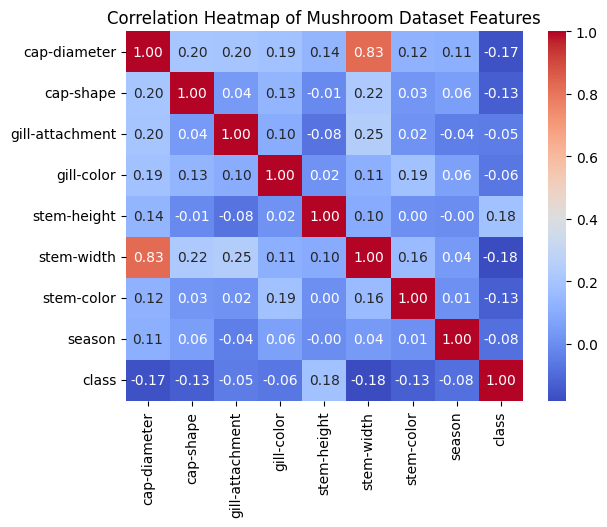

In [6]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Mushroom Dataset Features')
plt.show()

In [7]:
cols = df.columns.to_list()
cols.remove('class')

X = df[cols]
y = df["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [8]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# Model Development and Evaluation
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Gradient Boosting': GradientBoostingClassifier()
}

In [10]:
# Dictionary to store accuracy scores
accuracy_results = {'Model': [], 'Accuracy': []}

for name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)
    # Train models
    lr = LogisticRegression()
    lr.fit(X_train_scaled, y_train)

    rf = RandomForestClassifier()
    rf.fit(X_train_scaled, y_train)

    svm = SVC()
    svm.fit(X_train_scaled, y_train)

    gb = GradientBoostingClassifier()
    gb.fit(X_train_scaled, y_train)
    # Predictions
    y_pred = model.predict(X_test_scaled)
    y_pred_lr = lr.predict(X_test_scaled)
    y_pred_rf = rf.predict(X_test_scaled)
    y_pred_svm = svm.predict(X_test_scaled)
    y_pred_gb = gb.predict(X_test_scaled)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results['Model'].append(name)
    accuracy_results['Accuracy'].append(accuracy)

    # Print accuracy
    print(f"\n{name} Accuracy: {accuracy:.4f}")


Logistic Regression Accuracy: 0.6433

Random Forest Accuracy: 0.9896

SVM Accuracy: 0.9079

Gradient Boosting Accuracy: 0.8794


In [11]:
# Create a DataFrame from the accuracy results
accuracy_df = pd.DataFrame(accuracy_results)

# Display the accuracy table
print("\nAccuracy Table:")
print(accuracy_df)


Accuracy Table:
                 Model  Accuracy
0  Logistic Regression  0.643287
1        Random Forest  0.989636
2                  SVM  0.907930
3    Gradient Boosting  0.879430


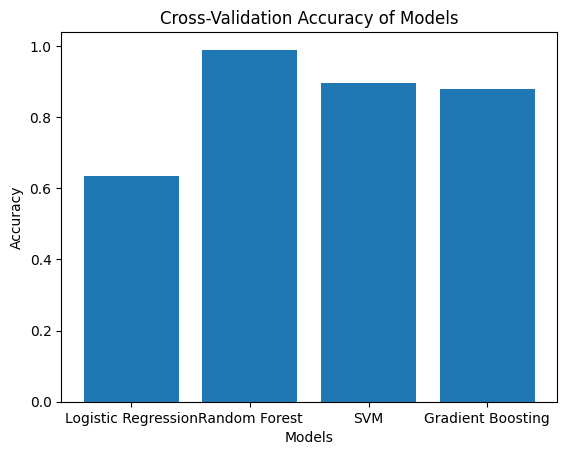

In [12]:
# Cross-validation
cv_results = {}
for name, model in models.items():
    cv_score = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy').mean()
    cv_results[name] = cv_score

# Visualize cross-validation results
plt.bar(cv_results.keys(), cv_results.values())
plt.title('Cross-Validation Accuracy of Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

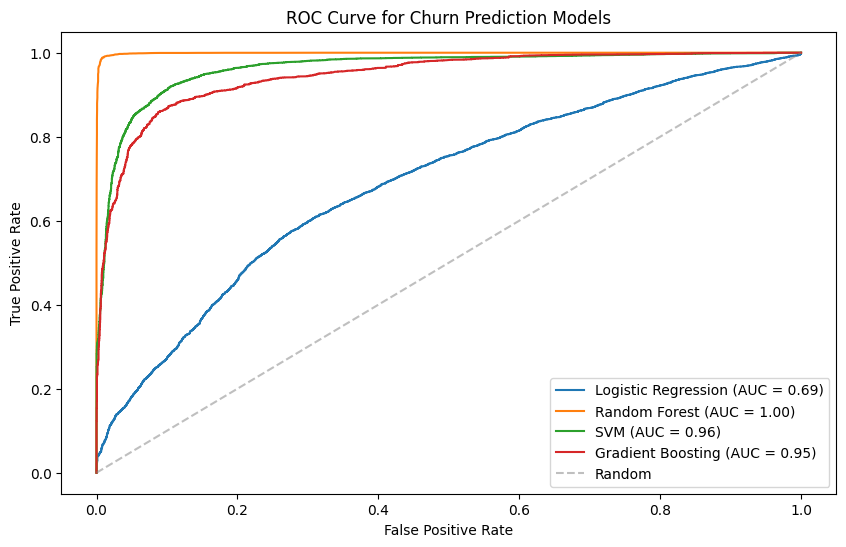

In [13]:
# Create a list of classifiers and their names
classifiers = [lr, rf, svm, gb]
classifier_names = ['Logistic Regression', 'Random Forest', 'SVM', 'Gradient Boosting']

# Plot ROC curve for each classifier
plt.figure(figsize=(10, 6))
for clf, name in zip(classifiers, classifier_names):
    if hasattr(clf, "predict_proba"):  # Check if the classifier supports probability estimates
        y_prob = clf.predict_proba(X_test_scaled)[:, 1]
    else:
        y_prob = clf.decision_function(X_test_scaled)  # Use decision function for SVC
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plotting the random classifier for reference (diagonal line)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random', alpha=0.5)

# Add labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Churn Prediction Models')
plt.legend(loc='lower right')
plt.show()

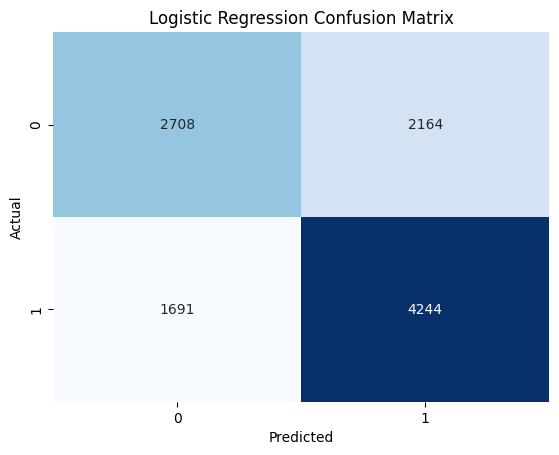

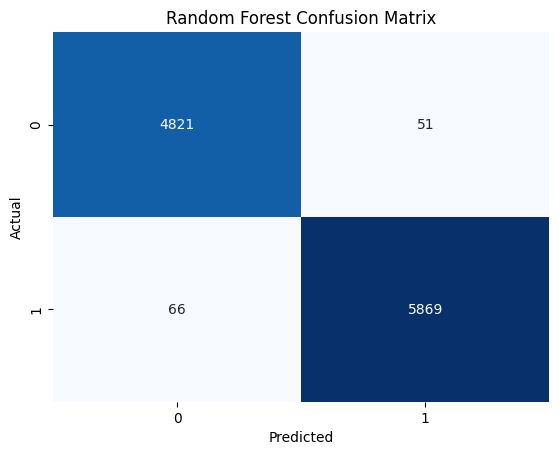

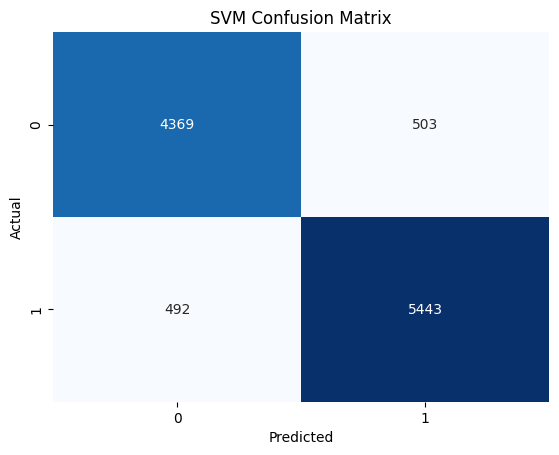

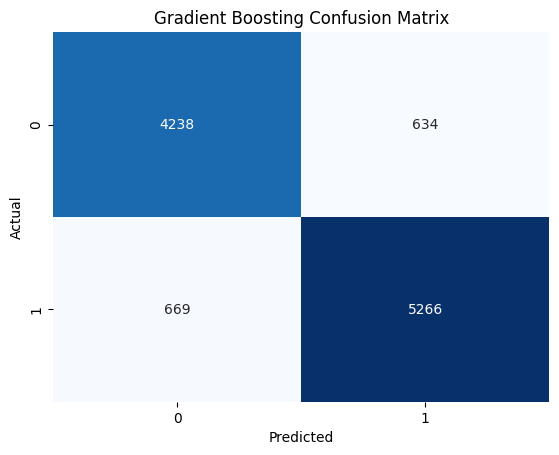

In [14]:
def plot_confusion_matrix(model_name, y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Example Usage:
models = ['Logistic Regression', 'Random Forest', 'SVM', 'Gradient Boosting']
for model_name, y_pred in zip(models, [y_pred_lr, y_pred_rf, y_pred_svm, y_pred_gb]):
    plot_confusion_matrix(model_name, y_test, y_pred)